In [3]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_squared_error, r2_score

from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor

from xgboost import XGBRegressor

sns.set(style="whitegrid")


In [5]:
train_df = pd.read_excel("train.xlsx")
test_df  = pd.read_excel("test2.xlsx")

train_df.head()


,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,9117000170,20150505T000000,268643,4,2.25,1810,9240,2.0,0,0,...,7,1810,0,1961,0,98055,47.4362,-122.187,1660,9240
1,6700390210,20140708T000000,245000,3,2.50,1600,2788,2.0,0,0,...,7,1600,0,1992,0,98031,47.4034,-122.187,1720,3605
2,7212660540,20150115T000000,200000,4,2.50,1720,8638,2.0,0,0,...,8,1720,0,1994,0,98003,47.2704,-122.313,1870,7455
3,8562780200,20150427T000000,352499,2,2.25,1240,705,2.0,0,0,...,7,1150,90,2009,0,98027,47.5321,-122.073,1240,750
4,7760400350,20141205T000000,232000,3,2.00,1280,13356,1.0,0,0,...,7,1280,0,1994,0,98042,47.3715,-122.074,1590,8071


In [6]:
train_df["log_price"] = np.log1p(train_df["price"])


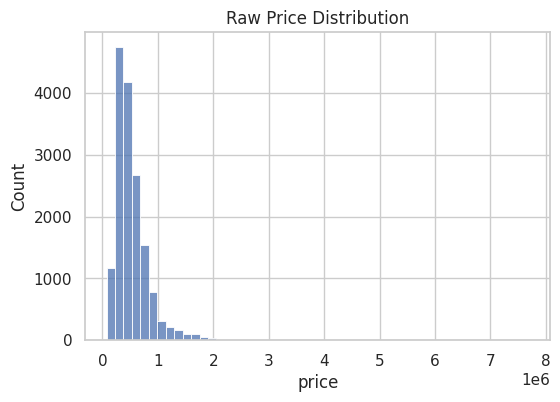

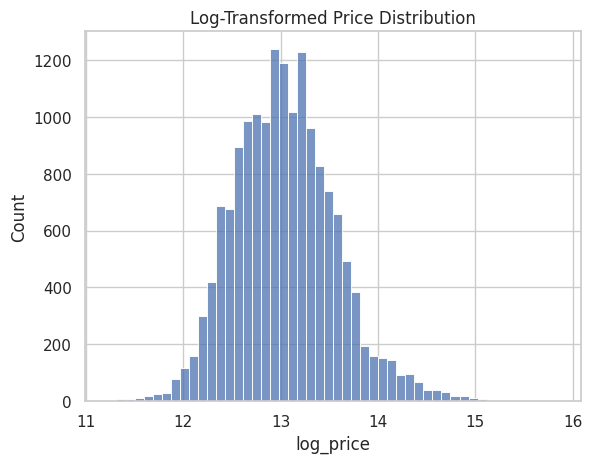

In [7]:
plt.figure(figsize=(6,4))
sns.histplot(train_df["price"], bins=50)
plt.title("Raw Price Distribution")
plt.show()

sns.histplot(train_df["log_price"], bins=50)
plt.title("Log-Transformed Price Distribution")
plt.show()


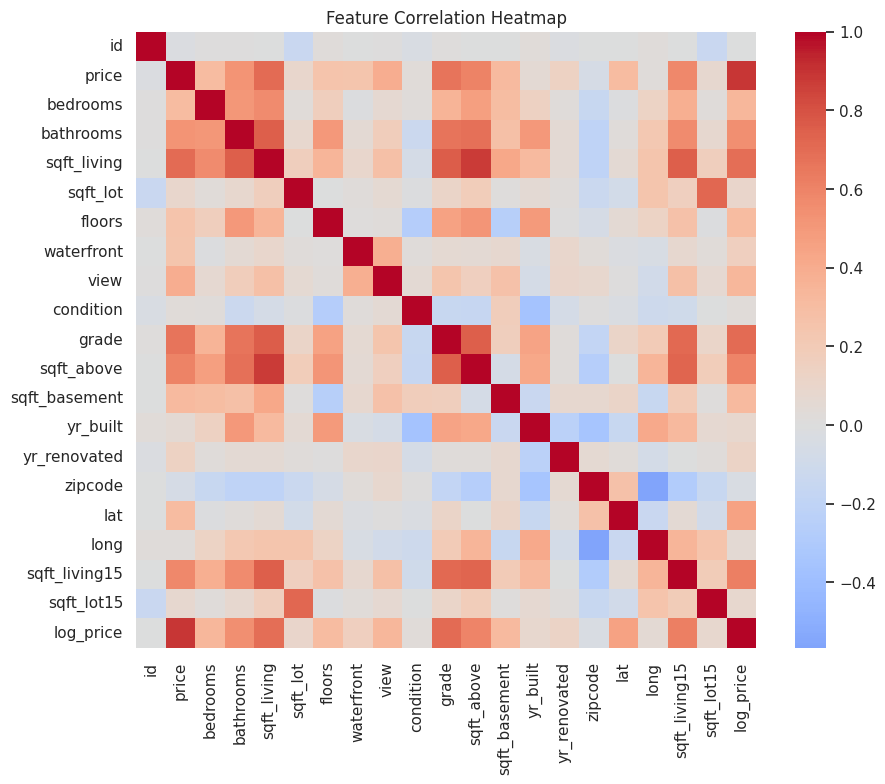

In [8]:
plt.figure(figsize=(10,8))
corr = train_df.corr(numeric_only=True)
sns.heatmap(corr, cmap="coolwarm", center=0)
plt.title("Feature Correlation Heatmap")
plt.show()


In [9]:
features = [
    "bedrooms", "bathrooms", "sqft_living",
    "sqft_lot", "floors", "condition",
    "grade", "lat", "long"
]

X = train_df[features]
y = train_df["log_price"]


In [10]:
X_train, X_val, y_train, y_val = train_test_split(
    X, y, test_size=0.2, random_state=42
)


In [12]:
lr = LinearRegression()
lr.fit(X_train, y_train)

preds = lr.predict(X_val)
mse = mean_squared_error(y_val, preds)
rmse = np.sqrt(mse)
r2 = r2_score(y_val, preds)

rmse, r2

(np.float64(0.27574629843210563), 0.7244609384116479)

In [14]:
rf = RandomForestRegressor(
    n_estimators=200,
    random_state=42,
    n_jobs=-1
)
rf.fit(X_train, y_train)

preds = rf.predict(X_val)
mse = mean_squared_error(y_val, preds)
rmse = np.sqrt(mse)
r2 = r2_score(y_val, preds)

rmse, r2

(np.float64(0.1877650483884681), 0.8722404717600656)

In [15]:
xgb = XGBRegressor(
    n_estimators=500,
    learning_rate=0.05,
    max_depth=6,
    subsample=0.8,
    colsample_bytree=0.8,
    random_state=42
)
xgb.fit(X_train, y_train)

preds = xgb.predict(X_val)
rmse = mean_squared_error(y_val, preds)
rmse = np.sqrt(mse)
r2 = r2_score(y_val, preds)

rmse, r2


(np.float64(0.1877650483884681), 0.8846706094047245)

**Baseline Model Results**

We evaluated multiple tabular-only regression models to establish a strong baseline for property price prediction. Linear Regression achieved moderate performance, while ensemble-based methods significantly improved accuracy by capturing nonlinear interactions among structural and location-based features.

Among the tested models, XGBoost was selected as the final tabular baseline due to its highest R² score (0.885) and strong generalization performance on the validation set. Despite this strong baseline, tabular features alone cannot fully capture neighborhood-level visual characteristics such as green cover, road density, and surrounding infrastructure. Therefore, incorporating satellite imagery is justified to provide additional environmental context that may further improve predictive performance.